<a href="https://colab.research.google.com/github/SarthakPradhan/Kaggle/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.preprocessing import OrdinalEncoder

In [58]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
housing = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/train.csv")
housing_test = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/test.csv")
print("data shape",housing.shape)
print(housing.columns)


data shape (1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

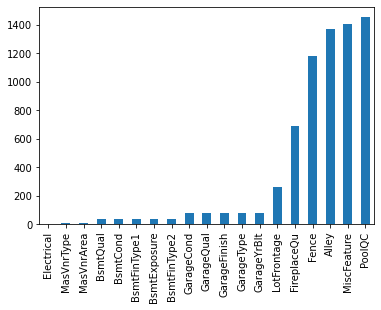

In [60]:


missing = housing.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()



In [61]:
#features removed with high missing value %
Ids = housing_test["Id"]
housing.drop(['Id','FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], axis = 1,inplace=True)
housing_test.drop(['Id','FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], axis = 1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5149a1750>,
      dtype=object)

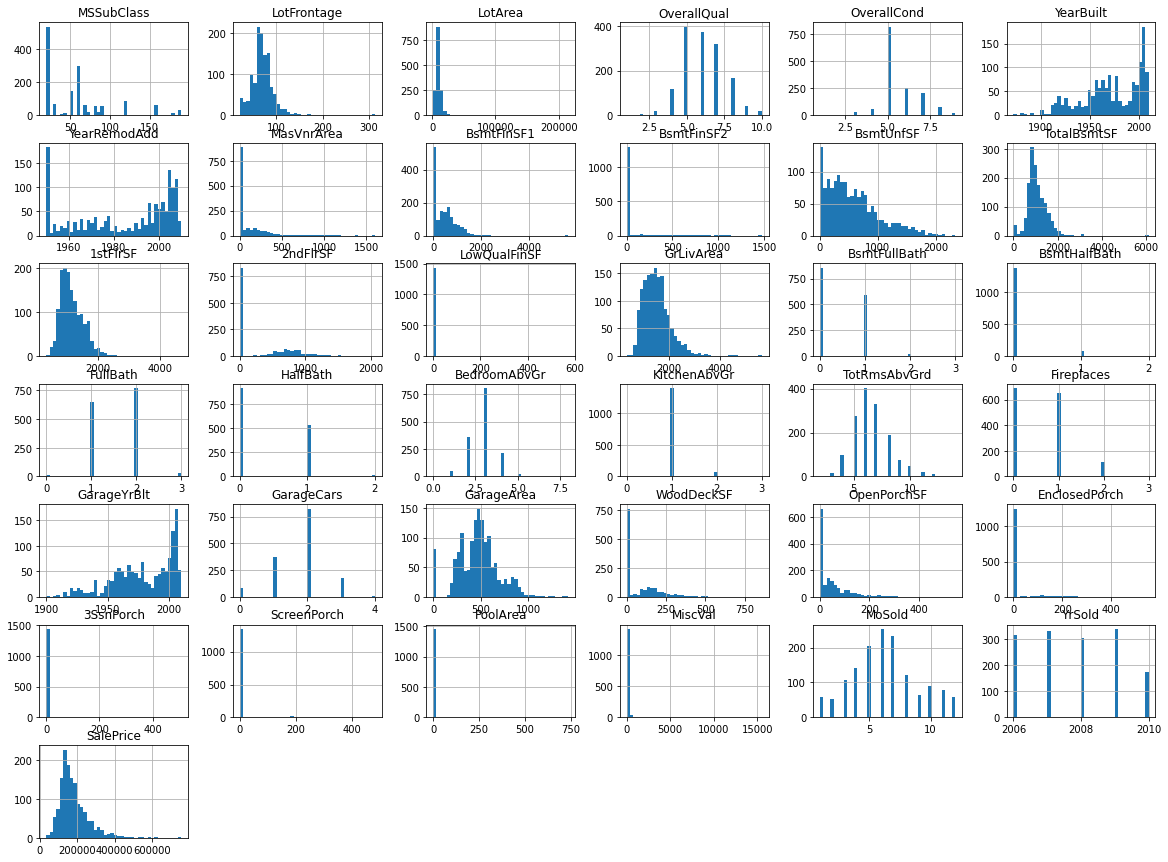

In [62]:
housing.hist(bins=40, figsize=(20,15))
#plt.show()

In [63]:
#features removed with low variation 
#housing.describe()

In [64]:
quantitative = [f for f in housing.columns if housing.dtypes[f] != 'object']

qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

print(len(quantitative),len(qualitative))

37 38


In [65]:
drop_standard_deviation = []
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0.3)
var_thres.fit(housing[quantitative])

VarianceThreshold(threshold=0.3)

In [66]:
len(quantitative)

37

In [67]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [68]:

dropped_cols = [quantitative[i]  for i, x in enumerate(var_thres.get_support()) if x == False]

print("Dropped columns due to low variance are",dropped_cols)
quantitative = [x for x, y in zip(quantitative, var_thres.get_support()) if y == True]
housing = housing.drop(dropped_cols,axis=1)
housing_test.drop(dropped_cols, axis = 1,inplace=True)

Dropped columns due to low variance are ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr']


In [69]:
housing.shape

(1460, 71)

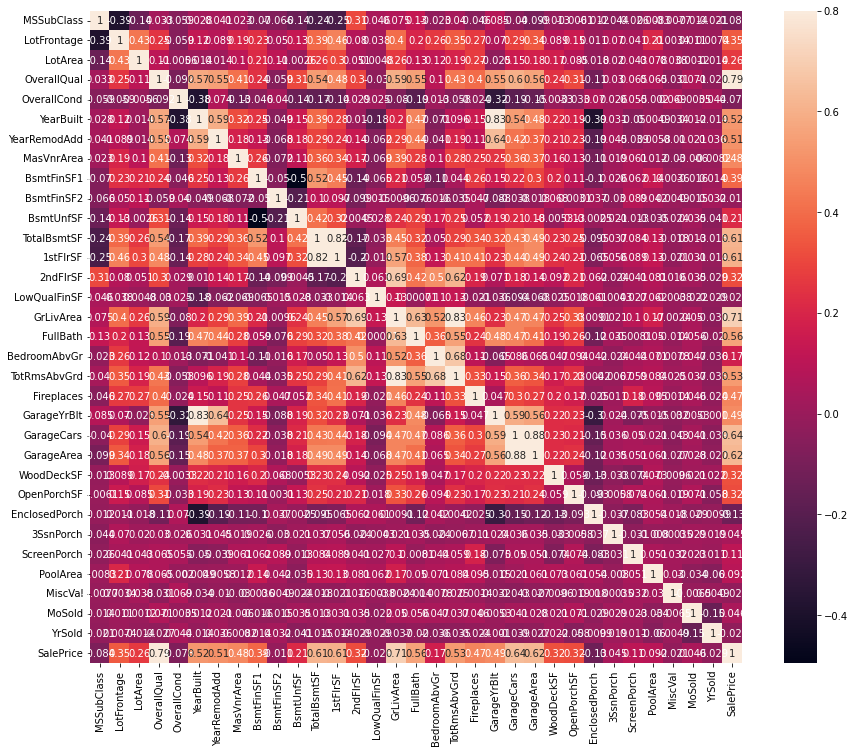

In [70]:
corr_matrix = housing.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True,vmax=.8, square=True);

In [71]:

#attributes = ["YearBuilt", "TotalBsmtSF", "GarageArea","SalePrice"]
#scatter_matrix(housing[attributes], figsize=(12, 8))

In [72]:
features = housing.iloc[:,:-1]
corr_matrix = housing.iloc[:,:-1].corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

# Drop features 
housing.drop(to_drop, axis=1, inplace=True)
housing_test.drop(to_drop, axis = 1,inplace=True)

In [73]:
print(to_drop)
housing.shape

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


(1460, 67)

In [74]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,2,3,Gd,Typ,0,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,2,3,TA,Typ,1,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,2,3,Gd,Typ,1,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,3,Gd,Typ,1,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,2,4,Gd,Typ,1,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [75]:

    
quantitative = [f for f in housing.columns if housing.dtypes[f] != 'object']

qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

print(len(quantitative),len(qualitative))

29 38


In [76]:
for c in qualitative:
    housing[c] = housing[c].astype('category')
    
    if housing[c].isnull().any()or housing_test[c].isnull().any():
   
      housing[c].fillna(housing[c].mode().iloc[0], inplace=True)
      housing_test[c].fillna(housing_test[c].mode().iloc[0], inplace=True)

for c in quantitative[:-1]:      
    if housing[c].isnull().any()or housing_test[c].isnull().any():
   
      housing[c].fillna(housing[c].mode().iloc[0], inplace=True)
      housing_test[c].fillna(housing_test[c].mode().iloc[0], inplace=True)

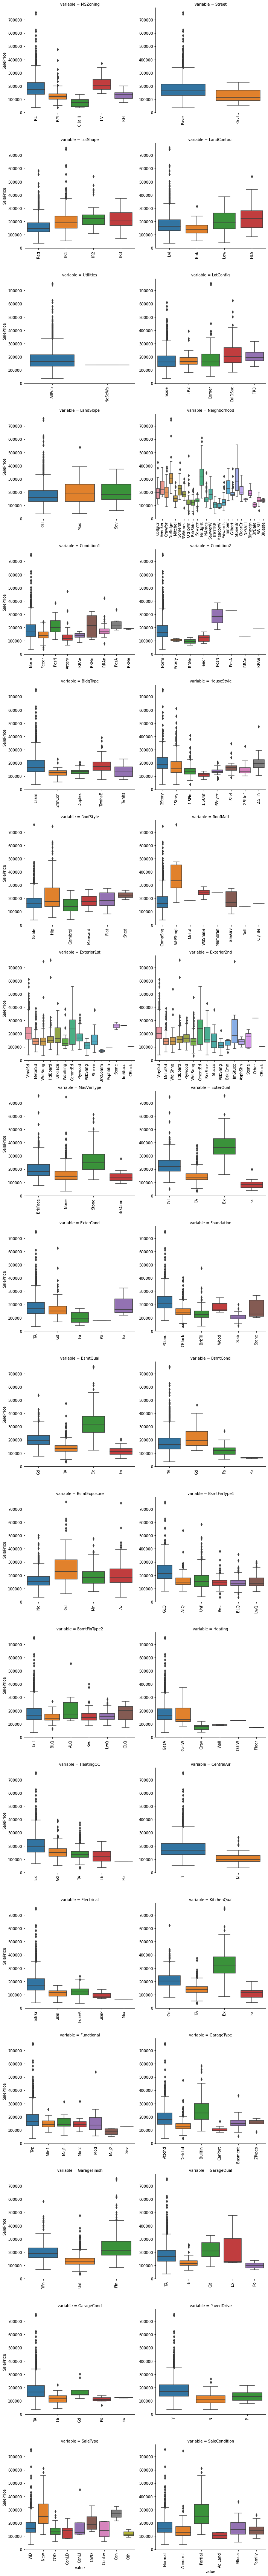

In [77]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

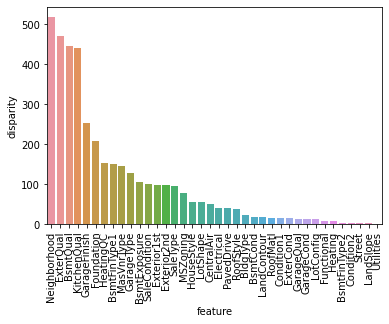

In [78]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(housing)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [79]:
qualitative_ord= [
'BsmtQual',
'KitchenQual',
"ExterQual" ,
"GarageQual",

'GarageFinish',
'Foundation'
]

In [80]:
qualitative_nom= [

'Neighborhood'

]

qualitative = qualitative_nom + qualitative_ord

In [81]:
quantitative=[
 'OverallQual',
 'OverallCond',
 'YearBuilt',

 'TotalBsmtSF',
 '2ndFlrSF',

 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',

 'GarageCars',
 "SalePrice"

]

In [82]:
features = qualitative + quantitative

In [83]:
housing = housing[features]
housing_test = housing_test[features[:-1]]


In [84]:
housing_test.shape

(1459, 16)

In [85]:
# dict_rank = {
                       
                       

#                        "BsmtQual" : {"No" , "Po" , "Fa" , "TA", "Gd" , "Ex" },
                      
#                        "ExterQual" : {"Po" , "Fa" , "TA", "Gd", "Ex" },


#                        "GarageQual" : {"No" , "Po" , "Fa" , "TA" , "Gd" , "Ex" },
                       
#                        "KitchenQual" : {"Po" , "Fa" , "TA" , "Gd" , "Ex" },

#                        'GarageFinish':{ 'Unf', 'RFn', 'Fin'},

#                        'Foundation':['Slab', 'Stone','BrkTil', 'CBlock',  'Wood','PConc' ]}

                       


# 'Neighborhood',


In [86]:
bsq=["No" , "Po" , "Fa" , "TA", "Gd" , "Ex"]
exq=["Po" , "Fa" , "TA", "Gd", "Ex" ]
grq=["No" , "Po" , "Fa" , "TA" , "Gd" , "Ex" ]
ktq=["Po" , "Fa" , "TA" , "Gd" , "Ex"]
grf=['Unf', 'RFn', 'Fin']
foun=['Slab', 'Stone','BrkTil', 'CBlock',  'Wood','PConc' ]

In [87]:
ordi = OrdinalEncoder(categories=[bsq, exq,grq,ktq,grf,foun])

housing[qualitative_ord]=ordi.fit_transform(housing[qualitative_ord])
housing_test[qualitative_ord]=ordi.fit_transform(housing_test[qualitative_ord])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [88]:
print(housing.head())

  Neighborhood  BsmtQual  KitchenQual  ...  BedroomAbvGr  GarageCars  SalePrice
0      CollgCr       4.0          3.0  ...             3           2     208500
1      Veenker       4.0          2.0  ...             3           2     181500
2      CollgCr       4.0          3.0  ...             3           2     223500
3      Crawfor       3.0          3.0  ...             3           3     140000
4      NoRidge       4.0          3.0  ...             4           3     250000

[5 rows x 17 columns]


In [89]:
print(housing_test.head())

  Neighborhood  BsmtQual  KitchenQual  ...  FullBath  BedroomAbvGr  GarageCars
0        NAmes       3.0          2.0  ...         1             2         1.0
1        NAmes       3.0          3.0  ...         1             3         1.0
2      Gilbert       4.0          2.0  ...         2             3         2.0
3      Gilbert       3.0          3.0  ...         2             3         2.0
4      StoneBr       4.0          3.0  ...         2             2         2.0

[5 rows x 16 columns]


In [90]:
print(type(housing))
print(type(housing_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [91]:
housing.head()

,Neighborhood,BsmtQual,KitchenQual,ExterQual,GarageQual,GarageFinish,Foundation,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SalePrice
0,CollgCr,4.0,3.0,4.0,2.0,1.0,5.0,7,5,2003,856,854,1710,2,3,2,208500
1,Veenker,4.0,2.0,3.0,2.0,1.0,3.0,6,8,1976,1262,0,1262,2,3,2,181500
2,CollgCr,4.0,3.0,4.0,2.0,1.0,5.0,7,5,2001,920,866,1786,2,3,2,223500
3,Crawfor,3.0,3.0,3.0,2.0,0.0,2.0,7,5,1915,756,756,1717,1,3,3,140000
4,NoRidge,4.0,3.0,4.0,2.0,1.0,5.0,8,5,2000,1145,1053,2198,2,4,3,250000


In [92]:
one_hot = pd.get_dummies(housing['Neighborhood'])
housing = housing.drop("Neighborhood",axis = 1)


housing = housing.join(one_hot,how = 'left')


In [93]:
housing.head()

,BsmtQual,KitchenQual,ExterQual,GarageQual,GarageFinish,Foundation,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SalePrice,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,4.0,3.0,4.0,2.0,1.0,5.0,7,5,2003,856,854,1710,2,3,2,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.0,2.0,3.0,2.0,1.0,3.0,6,8,1976,1262,0,1262,2,3,2,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.0,3.0,4.0,2.0,1.0,5.0,7,5,2001,920,866,1786,2,3,2,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,3.0,2.0,0.0,2.0,7,5,1915,756,756,1717,1,3,3,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,3.0,4.0,2.0,1.0,5.0,8,5,2000,1145,1053,2198,2,4,3,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [94]:

one_hot = pd.get_dummies(housing_test['Neighborhood'])
housing_test = housing_test.drop("Neighborhood",axis = 1)
housing_test = housing_test.join(one_hot,how = 'left')

In [95]:
housing_test.shape

(1459, 40)

In [96]:
# def encode(frame, feature):
#     ordering = pd.DataFrame()
#     ordering['val'] = frame[feature].unique()
#     ordering.index = ordering.val
#     ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
#     ordering = ordering.sort_values('spmean')
#     ordering['ordering'] = range(1, ordering.shape[0]+1)
#     ordering = ordering['ordering'].to_dict()
    
#     for cat, o in ordering.items():
#         frame.loc[frame[feature] == cat, feature+'_E'] = o
    
# qual_encoded = []
# for q in qualitative:  
#     encode(housing, q)
#     qual_encoded.append(q+'_E')
# print(qual_encoded)


In [97]:
# def spearman(frame, features):
#     spr = pd.DataFrame()
#     spr['feature'] = features
#     spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
#     spr = spr.sort_values('spearman')
#     plt.figure(figsize=(6, 0.25*len(features)))
#     sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
# features = quantitative + qual_encoded
# spearman(housing, features)

In [98]:


# plt.figure(1)
# corr = housing[quantitative].corr()
# sns.heatmap(corr)
# plt.figure(2)
# corr_qual = housing[qual_encoded].corr()
# sns.heatmap(corr_qual)
# plt.figure(3)
# corr_quant_qual = pd.DataFrame(np.zeros([len(quantitative), len(qual_encoded)]), index=quantitative, columns=qual_encoded)
# for q1 in quantitative:
#     for q2 in qual_encoded:
#         corr_quant_qual.loc[q1, q2] = housing[q1].corr(housing[q2])
# sns.heatmap(corr_quant_qual)



In [99]:

# # Select upper triangle of correlation matrix
# upper = corr_qual.where(np.triu(np.ones(corr_qual.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.8
# to_keep = [column for column in upper.columns if any(abs(upper[column]) < 0.8)]
# qual_encoded = to_keep
# # Drop features 
# #housing.drop(to_drop, axis=1, inplace=True)
# #qual_encoded

In [100]:
# qualitative_E = [
# 'BsmtQual_E',
# 'KitchenQual_E',

# "BsmtQual_E",
# 'Neighborhood_E',
# 'GarageFinish_E',
# 'Foundation_E'
# ]

In [101]:
# quantitative=[
#  'OverallQual',
#  'OverallCond',
#  'YearBuilt',

#  'TotalBsmtSF',
#  '2ndFlrSF',

#  'GrLivArea',
#  'FullBath',
#  'BedroomAbvGr',

#  'GarageCars',
#  "SalePrice"

# ]

In [102]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=45)


In [103]:
price_train = train_set.pop("SalePrice")
price_test = test_set.pop("SalePrice")

In [104]:
features = train_set.columns

In [105]:
features

Index(['BsmtQual', 'KitchenQual', 'ExterQual', 'GarageQual', 'GarageFinish',
       'Foundation', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'GarageCars',
       'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [106]:


def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train_set[features].values
Y = price_train
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.14232312403816158

In [114]:
Ypred = np.exp(lasso.predict(test_set.values))
Y = price_test
error(Y, Ypred)

0.15087615935290705

In [118]:
Ypred[:5]

array([181197.6526071 , 128580.16670812, 290264.73830523, 281107.47805538,
       229480.27342596])

In [119]:
Y.values[:5]

array([164700, 116000, 266000, 258000, 190000])

In [108]:
X = housing_test[features].values
Ypred = np.exp(lasso.predict(X))

In [109]:
Ypred

array([118696.34699206, 150367.71707247, 170484.78911585, ...,
       147806.58063035, 119115.1298425 , 222653.53310874])

In [113]:
output = pd.DataFrame({'Id': Ids.values, 'SalePrice': Ypred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
